# Time Series Analysis on Fruits and Vegetable Prices

In [61]:
import pandas as pd

Loading the dataset

In [62]:
df_veg_price = pd.read_csv("data/kalimati_tarkari_dataset.csv")
df_veg_price.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


## Data Cleaning

In [63]:
# Look at the number of unique option for each feature
df_veg_price.nunique()

SN           197161
Commodity       132
Date           2753
Unit              4
Minimum         198
Maximum         205
Average         384
dtype: int64

There is a total of 4 unique unit type. To keep things simple we will only use records with the unit type Kg and drop the rest. We will also lower caps all the unit so that it will not be mistreated as a different unit

In [64]:
df_veg_price["Unit"].unique()

array(['Kg', 'Doz', '1 Pc', 'KG'], dtype=object)

In [65]:
# Convert all the units to lower Caps
df_veg_price["Unit"] = df_veg_price["Unit"].str.lower()
# Select all row where it uses unit as kg
df_veg_price = df_veg_price[df_veg_price["Unit"] == "kg"]
df_veg_price.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,kg,28.0,30.0,29.0


Let us focus on one type of Vegetable.

As the list might contain many fruits and vegetable that we are not familiar with, we will go with Lettuce for now

In [66]:
df_lettuce_price = df_veg_price[df_veg_price["Commodity"] == "Lettuce"]
df_lettuce_price.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
40,40,Lettuce,2013-06-16,kg,55.0,60.0,57.5
113,113,Lettuce,2013-06-17,kg,45.0,50.0,47.5
186,186,Lettuce,2013-06-18,kg,35.0,40.0,37.5
259,259,Lettuce,2013-06-19,kg,55.0,60.0,57.5
333,333,Lettuce,2013-06-20,kg,45.0,50.0,47.5


In [67]:
# Check for missing data
df_lettuce_price.isnull().value_counts()

SN     Commodity  Date   Unit   Minimum  Maximum  Average
False  False      False  False  False    False    False      2575
Name: count, dtype: int64

In [68]:
df_lettuce_price.nunique()

SN           2575
Commodity       1
Date         2575
Unit            1
Minimum        32
Maximum        34
Average        46
dtype: int64

Since unit is of the same record for every row, there is no need to keep this feature, hence we will proceed to drop the feature which is not needed for analysis which is SN, Commodity and Unit

In [69]:
df_lettuce_price = df_lettuce_price.drop(columns=["SN", "Commodity", "Unit"])

Checking on Missing Dates

In [70]:
# Convert Date feature to a datetime type
df_lettuce_price["Date"] = pd.to_datetime(df_lettuce_price["Date"])
print(df_lettuce_price.shape)

(2575, 4)


In [71]:
# Function to check which are the date that are missing
def check_missing_date(date_series):
    # Retrieve and create date range
    start_date = date_series.min()
    end_date = date_series.max()
    complete_date = pd.date_range(start= start_date, end= end_date)
    # Return the difference compared with the original date series
    return complete_date.difference(date_series)

missing_dates = check_missing_date(df_lettuce_price["Date"])
print(len(missing_dates))

314


A common method for time series data inputation is to use linear interpolation. We will use linear interpolation to inpute the records with missing date

In [72]:
# Glimpse of data before interpolation
df_lettuce_price.head(15)

,Date,Minimum,Maximum,Average
40,2013-06-16,55.0,60.0,57.5
113,2013-06-17,45.0,50.0,47.5
186,2013-06-18,35.0,40.0,37.5
259,2013-06-19,55.0,60.0,57.5
333,2013-06-20,45.0,50.0,47.5
407,2013-06-21,40.0,45.0,42.5
480,2013-06-25,45.0,50.0,47.5
553,2013-06-26,40.0,50.0,45.0
625,2013-06-27,45.0,50.0,47.5
695,2013-06-28,45.0,50.0,47.5


In [73]:
df_lettuce_price = df_lettuce_price.set_index("Date")
df_lettuce_price = df_lettuce_price.resample("D").interpolate(method="linear")

In [74]:
# Check if any dates are still missing
missing_dates = check_missing_date(df_lettuce_price.index)
print(len(missing_dates))

0


In [75]:
# Glimpse of data before interpolation
df_lettuce_price.head(15)

,Minimum,Maximum,Average
Date,,,
2013-06-16,55.00,60.00,57.50
2013-06-17,45.00,50.00,47.50
2013-06-18,35.00,40.00,37.50
2013-06-19,55.00,60.00,57.50
2013-06-20,45.00,50.00,47.50
2013-06-21,40.00,45.00,42.50
2013-06-22,41.25,46.25,43.75
2013-06-23,42.50,47.50,45.00
2013-06-24,43.75,48.75,46.25


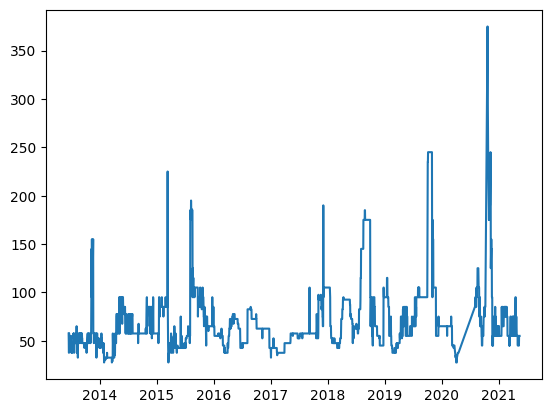

In [76]:
# Plotting the chart after data inputation
import matplotlib.pyplot as plt
plt.plot(df_lettuce_price.index, df_lettuce_price["Average"])

## Hypothesis Testing for Stationary

One of the important assumption of time series analysis is that the data has to be stationary hence we will make use of the ADF hypothesis testing to determine if the price of lettuce is stationary with 95% confidence interval.

```
H0: Data is non-stationary
H1: Data is stationary

P <= 0.05 Reject H0 
P > 0.05 Do not reject H0 as there is insufficient evidence to prove that it is non-stationary
```

In [77]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_lettuce_price["Average"])

print("P-value :", adf_test[1])

P-value : 1.3736278394301342e-09


Since p-value is lesser than 0.05 we will reject H0 and assume that the average price of Lettuce is stationary

## Time Series Modeling

### Simple Moving Average

In [78]:
df_lettuce_price["SMA"] = df_lettuce_price["Average"].rolling(window= 7).mean()
df_lettuce_price["SMA"] = df_lettuce_price["SMA"].shift(1)
df_lettuce_price.head(21)

,Minimum,Maximum,Average,SMA
Date,,,,
2013-06-16,55.00,60.00,57.50,NaN
2013-06-17,45.00,50.00,47.50,NaN
2013-06-18,35.00,40.00,37.50,NaN
2013-06-19,55.00,60.00,57.50,NaN
2013-06-20,45.00,50.00,47.50,NaN
2013-06-21,40.00,45.00,42.50,NaN
2013-06-22,41.25,46.25,43.75,NaN
2013-06-23,42.50,47.50,45.00,47.678571
2013-06-24,43.75,48.75,46.25,45.892857


### Cumulative Moving Average

In [79]:
df_lettuce_price["CMA"] = df_lettuce_price["Average"].expanding(min_periods= 7).mean()
df_lettuce_price["CMA"] = df_lettuce_price["CMA"].shift(1)
df_lettuce_price.head(21)

,Minimum,Maximum,Average,SMA,CMA
Date,,,,,
2013-06-16,55.00,60.00,57.50,NaN,NaN
2013-06-17,45.00,50.00,47.50,NaN,NaN
2013-06-18,35.00,40.00,37.50,NaN,NaN
2013-06-19,55.00,60.00,57.50,NaN,NaN
2013-06-20,45.00,50.00,47.50,NaN,NaN
2013-06-21,40.00,45.00,42.50,NaN,NaN
2013-06-22,41.25,46.25,43.75,NaN,NaN
2013-06-23,42.50,47.50,45.00,47.678571,47.678571
2013-06-24,43.75,48.75,46.25,45.892857,47.343750


### Exponential Moving Average

Use to identitfy trend and filter noise. The weight of the past data will decrease gradually
When Alpha is 1 is the same as the original value

In [80]:
df_lettuce_price["EMA"] = df_lettuce_price["Average"].ewm(alpha=0.5).mean()
df_lettuce_price.head(21)

,Minimum,Maximum,Average,SMA,CMA,EMA
Date,,,,,,
2013-06-16,55.00,60.00,57.50,NaN,NaN,57.500000
2013-06-17,45.00,50.00,47.50,NaN,NaN,50.833333
2013-06-18,35.00,40.00,37.50,NaN,NaN,43.214286
2013-06-19,55.00,60.00,57.50,NaN,NaN,50.833333
2013-06-20,45.00,50.00,47.50,NaN,NaN,49.112903
2013-06-21,40.00,45.00,42.50,NaN,NaN,45.753968
2013-06-22,41.25,46.25,43.75,NaN,NaN,44.744094
2013-06-23,42.50,47.50,45.00,47.678571,47.678571,44.872549
2013-06-24,43.75,48.75,46.25,45.892857,47.343750,45.562622
